# Introduction to Machine Learning Pipeline

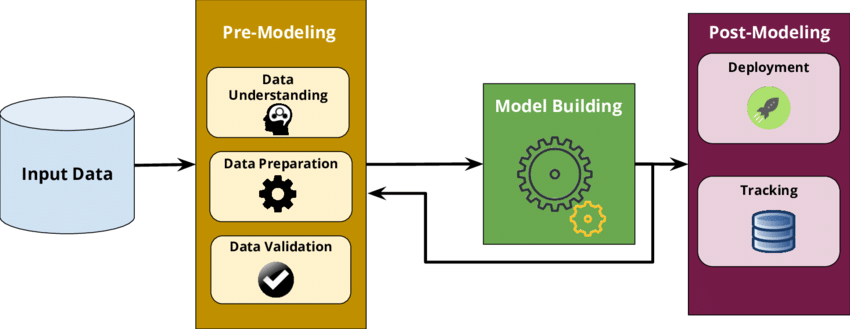

### What is a Pipeline?

 In simple terms, a pipeline in data science is a sequence of steps or processes that are put together to solve a specific problem or achieve a particular goal.

Think of it as a series of connected pipes, where each pipe represents a step in the process. Each step in the pipeline takes some input, performs some transformation or operation on it, and produces an output. The output of one step becomes the input of the next step, and this continues until you reach the final step and get the desired result.

To give you an example, let's say you want to build a machine learning model to predict whether a customer will churn or not based on their historical data. A typical pipeline for this task may include the following steps:

Data preprocessing: This step involves cleaning and transforming the raw data, handling missing values, encoding categorical variables, and scaling numerical features.

Feature engineering: Here, you extract or create relevant features from the data that can help improve the predictive power of your model. For example, you might calculate customer tenure, create interaction variables, or aggregate historical statistics.

Model selection and training: In this step, you choose a suitable machine learning algorithm for your problem, split the data into training and testing sets, train the model on the training data, and tune its hyperparameters to optimize its performance.

Model evaluation: Once the model is trained, you evaluate its performance using appropriate metrics and assess how well it predicts customer churn.

Deployment and monitoring: If the model performs well, you deploy it to a production environment where it can be used to make predictions on new data. You also set up monitoring mechanisms to track its performance over time and ensure it remains accurate and reliable.

By organizing these steps into a pipeline, you can streamline the workflow, automate repetitive tasks, and easily reproduce and iterate on your results. It also allows for easier collaboration between team members and promotes scalability and reusability of the solution.

Overall, a pipeline helps you manage the end-to-end process of solving a data science problem, from data preparation to model deployment, in a structured and efficient manner.

# Creating Machine Learning Pipeline

### importing packages


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [3]:
DiabetesData = pd.read_csv("pima-indians-diabetes.csv", header=None)

In [4]:
#Assign column names
DiabetesData.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
                        "DiabetesPedigreeFunction","Age","Class"]

In [5]:
DiabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
DiabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X_train,X_test,y_train,y_test=train_test_split(DiabetesData.iloc[:,[0,1,2,3,4,5,6,7]],DiabetesData.iloc[:,[8]],test_size=0.2,random_state=1)

# Creating pipelines 

### Creating pipelines for Logistic regression, Decision Tree and Random Forest models
Pipeline steps will include
Steps
* 1. Data Preprocessing using MinMax Scaler
* 2. Reducing Dimensionality using PCA
* 3. Training respective models

**NOTE** : These Steps Can Be modified Based on usecase and Purpose Like We Can Change the PreProceesing Techniques etc

In [8]:
#Logistic Regression Pipeline
LogisticRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression())])

In [9]:
#Decision tree Pipeline
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [10]:
#Random Forest Pipeline
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

# model training and validation

In [11]:
## Defining the pipelines in a list
mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [12]:
#Defining variables for choosing best model
accuracy=0.0
classifier=0
pipeline=""

In [13]:
# Creating dictionary of pipelines and training models
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# Fit the pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)

In [14]:
#getting test accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7597402597402597
Decision Tree Test Accuracy: 0.7012987012987013
Random Forest Test Accuracy: 0.7857142857142857


In [15]:
#Choosing best model for the given data
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Random Forest


* Best Performer: Random Forest
After evaluating the performance of all three models, Random Forest emerged as the best performer for diabetes prediction. It exhibited superior accuracy, precision, recall, and F1-score compared to Logistic Regression and Decision Tree. Random Forest's ability to handle complex relationships between features and its ensemble-based nature contributed to its effectiveness in this prediction task.

### Enhancements and Future Work
To further improve the ML pipeline and enhance the diabetes prediction model, consider the following:

* Feature Selection and Engineering: Explore additional feature selection techniques and domain-specific feature engineering methods to enhance the model's predictive power. This can involve incorporating domain knowledge or extracting new features from the existing ones.

* Hyperparameter Tuning: Optimize the hyperparameters of the Random Forest model or experiment with other ensemble-based models to potentially improve the performance further. Techniques like grid search or Bayesian optimization can be applied to find the best combination of hyperparameters.

* Model Evaluation and Monitoring: Implement a thorough model evaluation and monitoring framework

__________________________________
# END
_________________________________________